In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({"font.size": 12})

# Árvore de Decisão (Decision Tree)

Uma árvore de decisão é uma árvore binária onde os vários nós não-terminais correspondem a decisões acerca da amostra sendo analisada, e as folhas correspondem aos valores de predição. Por exemplo, considere o famoso dataset "Iris" e o problema de classificar as flores em "virginica", "versicolor" e "setosa".

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [7]:
!pip install graphviz



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\leona\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


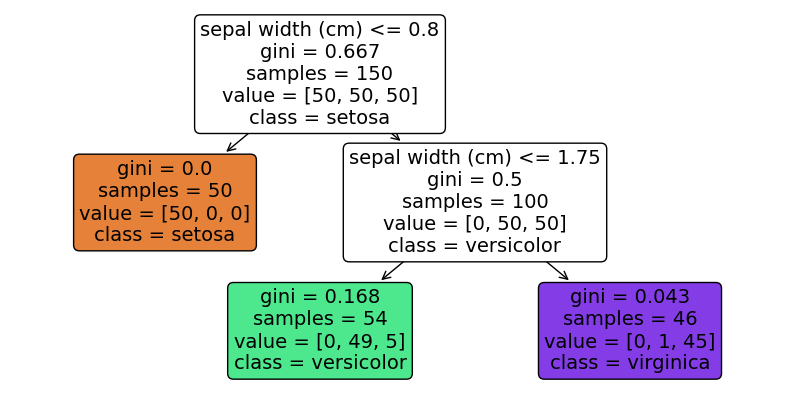

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Supondo que 'tree_clf' é o seu modelo de árvore de decisão já treinado
plt.figure(figsize=(10, 5))
plot_tree(tree_clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, rounded=True, 
          fontsize=14)
plt.show()


### Coeficiente de Gini

O coeficiente de Gini é uma métrica usada para quantificar a impureza ou a pureza de um nó em uma árvore de decisão, isto é, medida fundamental para avaliar a qualidade das divisões nas árvores de decisão, visando maximizar a pureza das classes nos nós resultantes. Aqui estão os pontos principais sobre o coeficiente de Gini:

- Medida de Impureza:

    O coeficiente de Gini é uma forma de medir o quão frequentemente um elemento aleatório do conjunto seria incorretamente classificado se fosse aleatoriamente etiquetado de acordo com a distribuição de classes no nó.

- Varia de 0 a 1:

    O coeficiente de Gini varia entre 0 e 1, onde 0 representa a pureza perfeita (todos os elementos no nó pertencem a uma única classe) e 1 representa a impureza máxima (distribuição uniforme das classes, ou seja, a maior incerteza).


A pureza, no contexto de árvores de decisão em aprendizado de máquina, refere-se à homogeneidade dos elementos em um nó específico em relação à classificação ou à variável de saída. Um nó é considerado "puro" se todos os seus elementos pertencem a uma única classe ou categoria.

---

## Fazendo previsões com uma árvore de decisão

In [11]:
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

O resultado array([[0., 0.90740741, 0.09259259]]) da função predict_proba do modelo de árvore de decisão tree_clf indica as probabilidades estimadas de que a instância de entrada (com características [5, 1.5]) pertença a cada uma das três classes do conjunto de dados Iris. Vamos detalhar o significado de cada valor na matriz de probabilidades:

- Primeira Classe (Iris Setosa):

    Probabilidade de 0.0 (ou 0%) de que a instância seja uma Iris Setosa.

- Segunda Classe (Iris Versicolor):

    Probabilidade de aproximadamente 0.9074 (ou 90.74%) de que a instância seja uma Iris Versicolor.

- Terceira Classe (Iris Virginica):

    Probabilidade de aproximadamente 0.0926 (ou 9.26%) de que a instância seja uma Iris Virginica.

Portanto, o modelo está prevendo que a instância dada tem uma alta probabilidade de ser uma Iris Versicolor e uma probabilidade muito baixa de ser uma Iris Virginica, enquanto a probabilidade de ser uma Iris Setosa é de 0%.

---


### CART (Classification and Regression Tree)

É um algoritmo de treinamento de árvores de decisão, baseado na noção de impureza do nó, que induz a partição do dataset em cada nó da arvore de modo a diminuir a impureza resultante do particionamento.

### Modelos paramétricos e não-paramétricos

Modelos paramétricos são aqueles modelos em que o número de parâmetros é fixo, independente do dataset. Modelos não-paramétricos são aqueles em que o número de parâmetros não é pré-determinado, mas sim depende do próprio dataset de treinamento.

- Exemplo de modelo paramétrico: regressão linear, regressão logística, LDA, QDA, etc.

- Exemplo de modelo não-paramétrico: KNN, árvores de decisão, SVM, etc.

### Qual o principal hiperparâmetro de regularização de uma árvore de decisão? Porque temos overfitting se este parâmetro não for restrito?

O principal parâmetro de regularização de uma árvore de decisão é a profundidade máxima da árvore (max_depth). Caso este parâmetro não seja restrito, a árvore pode expandir até que cada ponto do conjunto de treinamento vire uma partição por si só, caracterizando overfitting.

### CART consegue fazer tanto classificação (multiclasse inclusive!) como regressão! O que muda no CART entre classificação e regressão?

A medida de impureza.

### Explique porque não é necessário re-escalar as *features* quando usamos uma árvore de decisão.

Porque no algoritmo CART não importa o valor do corte: apenas a pureza das partições dele resultantes.